In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

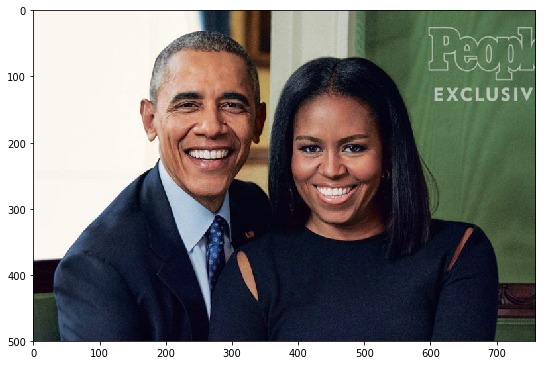

In [0]:
import cv2
image = cv2.imread('images/obamas.jpg')

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(9,9))
plt.imshow(image)

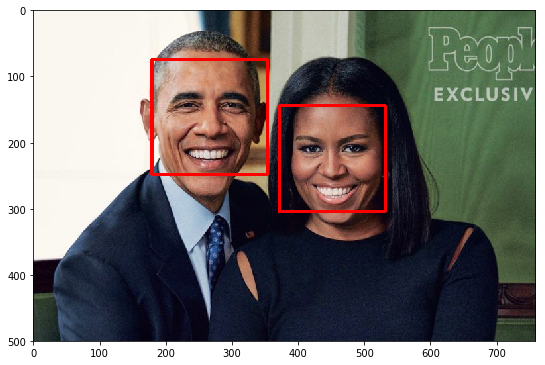

In [0]:
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

faces = face_cascade.detectMultiScale(image, 1.2, 2)

image_with_detections = image.copy()

for (x,y,w,h) in faces:
    cv2.rectangle(image_with_detections,(x,y),(x+w,y+h),(255,0,0),3) 

fig = plt.figure(figsize=(9,9))

plt.imshow(image_with_detections)

In [0]:
import torch
from models import Net
from torch.autograd import Variable
import cv2
net = Net()

net.load_state_dict(torch.load('saved_models/final_keypoint_model.pt'))

net.eval()

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv5): Conv2d(256, 512, kernel_size=(1, 1), stride=(1, 1))
  (pool5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=18432, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=136, bias=True)
  (drop1): Dropout(p=0.1)
  (drop2): Dropout(p=0.2)
  (drop3): Dropout(p=0.25)
  (drop4): Dropout(p=0.25)
  (drop5): Dropout(p=0

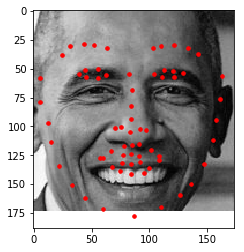

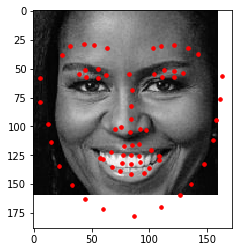

In [0]:
def showpoints(image,keypoints):
    plt.figure()
    keypoints = keypoints.data.numpy()
    
    keypoints = keypoints * 95.0 + 68
    
    keypoints = np.reshape(keypoints, (68, -1))
    
    plt.imshow(image, cmap='gray')
    
    plt.scatter(keypoints[:, 0], keypoints[:, 1], s=50, marker='.', c='r')

image = cv2.imread('images/obamas.jpg')
image_copy = np.copy(image)

for (x,y,w,h) in faces:
    roi = image_copy[y:y+h, x:x+w]
    roi = cv2.cvtColor(roi, cv2.COLOR_RGB2GRAY)
    image = roi

    roi = roi/255.0
    
    roi = cv2.resize(roi, (224,224))
    
    roi = np.expand_dims(roi, 0)
    roi = np.expand_dims(roi, 0)
    
    roi_torch = Variable(torch.from_numpy(roi))
    roi_torch = roi_torch.type(torch.FloatTensor)
    keypoints = net(roi_torch)
    
    showpoints(image,keypoints)    
